In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Bộ dữ liệu MNIST chứa 60,000 ảnh luyện và 10,000 ảnh kiểm định lấy từ nhân viên cục điều tra dân số Mỹ và sinh viên trung học Mỹ. Do đó, trong dòng thứ 2, ta đã phân tách 2 nhóm dữ liệu luyện và dữ liệu kiểm định và cũng phân tách nhãn và ảnh. Các phần x_train và x_test chứa mã độ xám (từ 0 tới 255) trong khi các phần y_train và y_test chứa các nhãn từ 0 tới 9 mà thể hiện số mà ảnh thể hiện. Để trực quan hóa các số này, ta dùng tới thư viện matplotlib.

7


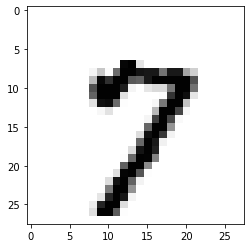

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 301 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

Chúng ta cũng cần biết và kích thước của bộ dữ liệu để chuyển nó tới mạng nơron tích chập. Do đó, ta sẽ sử dụng thuộc tính “shape” của mảng numpy với mã sau:

In [8]:
x_train.shape

(60000, 28, 28)

Ta sẽ nhận được (60000, 28, 28). Như ta có thể thấy 60000 thể hiện số ảnh trong bộ dữ liệu luyện và (28, 28) thể hiện kích thước của ảnh: 28 x 28 pixel.

## 1.4. Định dạng lại và chuẩn hóa ảnh
Để có thể sử dụng bộ dữ liệu từ API của Kerá, ta cần mảng numpy 4-chiều. Tuy nhiên, như ta đã thấy ở trên, mảng của chúng ta làm mảng 3-chiều. Thêm nữa, ta phải chuẩn hóa dữ liệu của ta như nó thường được đòi hỏi ở các mô hình mạng nơron. Ta có thể có được điều này bằng cách chia mã xãm cho 255 (mà là giá trị lớn nhất trừ đi giá trị nhỏ nhất. Xem đoạn mã sau:

In [9]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## 1.5. Xây dựng mạng nơron tích chập
Ta sẽ xây dựng mô hình bằng cách sử dụng API mức cao của Keras mà có thể sử dụng TensorFlow hay Theano như backend. Để ý rằng có một vài API mức cao của TensorFlow như Layers, Keras, và Estimators mà giúp ta tạo mạng nơron với tri thức mức cao. Do đó, ta có thể thấy các mã rất khác nhau của cùng một mạng nơron sử dụng tensorflow. Ta sẽ sử dụng trực tiếp các API của Keras. Do đó ta import Sequential Model from Keras và bổ sung các lớp Conv2D, MaxPooling, Flatten, Dropout, và Dense. Ta đã biết về các lớp Conv2D, Maxpooling, và Dense. Thêm vào đó, lớp Dropout loại bỏ overfitting bằng cách lờ đi một số nơron trong khi luyện. Lớp Flatten phẳng hóa mảng 2 chiều thành mảng 1 chiều trước khi xây dựng mạng kết nối đầy đủ.

In [10]:
# Importing the required Keras modules containing model and layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(60, kernel_size(3,3))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394


Ta có thể thử với một số nào đó đối với lớp Dense đầu; tuy nhiên lớp Dense sau phải có 10 nơron do ta có 10 lớp (0, 1, 2, …, 9). Ta có thể thử với kernel size, pool size, activation functions, dropout rate, và số nơron ở lớp Dense đầu để nhận kết quả tốt hơn

## 1.6. Dịch và luyện mô hình
Vớ mã ở trên, ta đã tạo một mạng CNN rỗng, chưa tối ưu. Đây là lúc thiết lập bộ tối ưu với hàm mất mát và sử dụng một số đo. Sau đó ta có thể luywwnj mô hình sử dụng dữ liệu luyện của ta. Chúng ta sẽ sử dụng mã sau cho các công việc này:

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 44s 728us/step - loss: 0.2032 - accuracy: 0.9391
Epoch 2/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.0837 - accuracy: 0.9746
Epoch 3/10
60000/60000 [==============================] - 44s 737us/step - loss: 0.0576 - accuracy: 0.9817
Epoch 4/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.0441 - accuracy: 0.9859
Epoch 5/10
60000/60000 [==============================] - 45s 742us/step - loss: 0.0353 - accuracy: 0.9882
Epoch 6/10
60000/60000 [==============================] - 45s 743us/step - loss: 0.0283 - accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 43s 708us/step - loss: 0.0243 - accuracy: 0.9918
Epoch 8/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0228 - accuracy: 0.9923
Epoch 9/10
60000/60000 [==============================] - 44s 728us/step - loss: 0.0179 - accuracy: 0.9934
Epoch 10/10
60000/60000 [============

Ta có thể thử với optimizer, loss function, metrics, và epochs. Tuy nhiên, ta có thể nói rằng bộ tối ưu adam thường tốt hơn các bộ tối ưu khác. Ở đây số epoch có vẻ hơi nhỏ. Tuy nhiên ta sẽ tiến tới độ chính xác kiểm định là 98–99%. Do bộ dữ liệu MNIST không yêu cầu năng lực tính toán nhiều, ta có thể dễ dàng thử với số epoch lớn hơn.

## 1.7. Đánh giá mô hình
Cuối cùng, ta có thể đánh giá mô hình đã được luyện với x_test và y_test sử dụng 1 dòng mã:

In [13]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 151us/step


[0.06268354122400488, 0.9843999743461609]

Chúng ta đã đạt được độ chính xác 98.5% với một mô hình cơ bản như vậy. Thành thật mà nói, trong nhiều trường hợp phân lớp ảnh (thí dụ với ô tô tự lái), ta thậm chí không thể chấp nhận lỗi 0.1% do nó sẽ gây ra 1 tai nạn trong số 1000 trường hợp. Tuy nhiên, đối với mô hình của ta, ta có thể nói kết quả tương đối tốt. Ta cũng có thể thực hiện các phép dự đoán với mã sau:

6


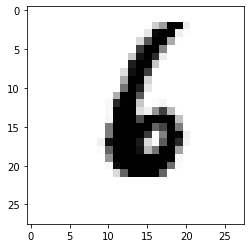

In [18]:
image_index = 4252
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [12]:
#save model
model.save("model-mnist.h5")